<a href="https://colab.research.google.com/github/MuhammadRezaPehlevi0218/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


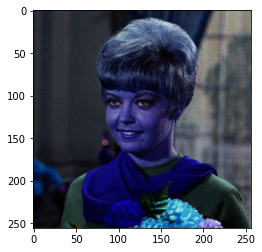

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Frame
reza = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/female.tiff')
plt.imshow(reza)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan[-255 - 255]: 70
Masukkan kontras [1.0 - 3.0]20


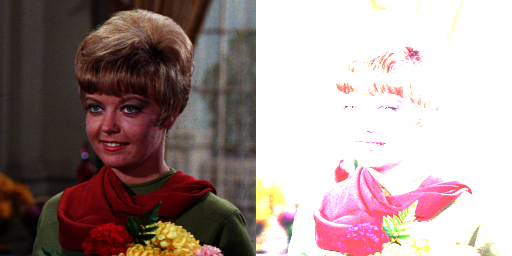

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]'))
except ValueError:
  print('Error, not a number')

contrast_reza = np.zeros(reza.shape, reza.dtype)

for y in range(reza.shape[0]):
  for x in range(reza.shape[1]):
    for c in range(reza.shape[2]):
      contrast_reza[y,x,c] = np.clip(contrast*reza[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((reza, contrast_reza))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 90


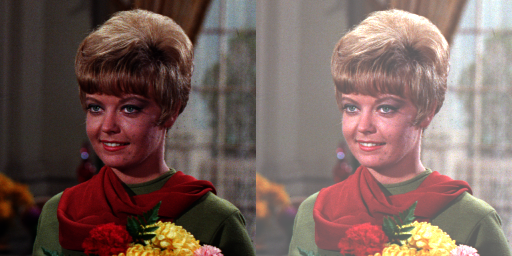

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
brightness_image = np.zeros(reza.shape, reza.dtype)

#akses per piksel
for y in range(reza.shape[0]):
  for x in range(reza.shape[1]):
    for c in range(reza.shape[2]):
      brightness_image[y,x,c] = np.clip(reza[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_reza= cv.convertScaleAbs(reza, beta=brightness)

final_frame = cv.hconcat((reza, brightness_image))
cv2_imshow(final_frame)

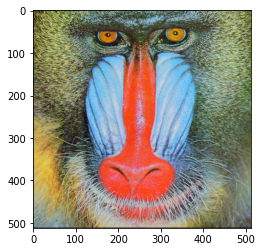

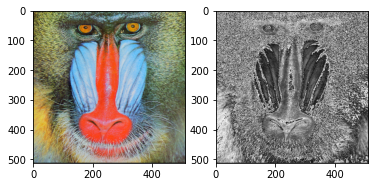

In [ ]:
reza1 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/mandrill.tiff')
reza_color = cv.cvtColor(reza1,cv.COLOR_BGR2RGB)
plt.imshow(reza_color)

# ekstraksi 3 channel warna
# gambar[x,y,c]

R, G, B = reza_color[:,:,0], reza_color[:,:,1],reza_color[:,:,2]

gray_reza = ( R + G + B) * 0.3

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 citra input dan output
axarr[0].imshow(reza_color)
axarr[1].imshow(gray_reza, cmap='gray')

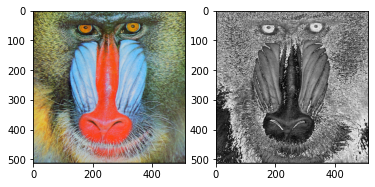

In [ ]:
R, G, B = reza_color[:,:,0], reza_color[:,:,1],reza_color[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B) #np.max(color_img, axis=2)
min_channels = np.minimum(np.minimum(R, G), B) #np.min(color_img, axis=2)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2) #membuat 2 plot untuk 2 citra input dan output
axarr[0].imshow(reza_color)
axarr[1].imshow(gray_img, cmap='gray')

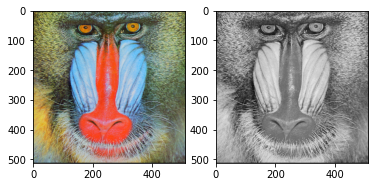

In [ ]:
R, G, B = reza_color[:,:,0], reza_color[:,:,1],reza_color[:,:,2]
gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(reza_color)
axarr[1].imshow(gray_img, cmap='gray')

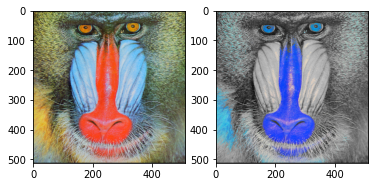

In [ ]:
ret, mask = cv.threshold(reza1[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(reza1)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(reza1, mask3)

gray = cv.cvtColor(reza1, cv.COLOR_BGR2GRAY)
reza1 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(reza1, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(reza_color)
ax[1].imshow(out, cmap='gray')